In [21]:
import sys
sys.path.append('..')

import numpy as np 
import pandas as pd 

from mod.SimSale import SimSale
from mod.Sale import Sale
from mod.Demand import Demand

# from numdifftools import Hessian,Jacobian

## 1.模拟数据 及 待估计参数

In [22]:
sim_sale=SimSale(level_size=[2,2],seed=10)
sale_df = sim_sale.generate_sale(lam=10000,size=100,un_ava_frac=0.25,un_ava_mix=False)
# print(sim_sale.attr_f_list[0])
# print(sim_sale.attr_f_list[1])
# print(sim_sale.attr_pi_list[0])
# print(sim_sale.attr_pi_list[1]) 
mod = Demand(data=sale_df)
print(mod.attr_trans)
print(mod.attr_sale_pct)
sale_df

[       A_a  A_b
A_a    NaN  NaN
A_b  100.0  NaN,        B_a  B_b
B_a    NaN  NaN
B_b  100.0  NaN]
[A_a    0.843088
A_b    0.156912
dtype: float64, B_a    0.536206
B_b    0.463794
dtype: float64]


,A_a*B_a,A_a*B_b,A_b*B_a,A_b*B_b
0,3649,4622,1496,NaN
1,3676,4554,1523,NaN
2,3766,4566,1541,NaN
3,3771,4532,1557,NaN
4,3665,4489,1616,NaN
...,...,...,...,...
95,3631,4437,1533,NaN
96,3628,4507,1509,NaN
97,3792,4559,1523,NaN
98,3769,4506,1479,NaN


## 2.参数估计

#################### 1.属性的选择概率 ####################
     Estimate     Guess   EG_Diff      Real   ER_Diff   GR_Diff
A_a  0.707366  0.843088 -0.135722  0.821531 -0.114165  0.021557
A_b  0.292634  0.156912  0.135722  0.178469  0.114165 -0.021557
     Estimate     Guess   EG_Diff     Real   ER_Diff   GR_Diff
B_a  0.527316  0.536206 -0.008891  0.45012  0.077196  0.086087
B_b  0.472684  0.463794  0.008891  0.54988 -0.077196 -0.086087
#################### 2.属性和商品的转移概率 ####################


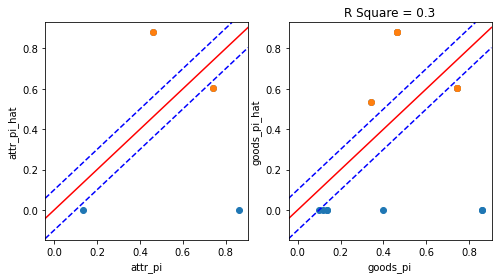

In [23]:
# method='dual_annealing' / 'differential_evolution'
mod.fit(method='dual_annealing',only_effect=True,maxiter=2000)
# mod.fit(method='differential_evolution')

mod.summary(SimSale=sim_sale)

In [10]:
np.concatenate(list(map(lambda x:x.to_numpy(),mod.guess_theta_f())))

array([0.82601787, 0.17398213, 0.38763001, 0.43306147, 0.17930852])

In [6]:
mod.fill_incomplete_theta_flatten(np.arange(8))

TypeError: only integer scalar arrays can be converted to a scalar index

In [11]:
np.append(np.concatenate(list(map(lambda x:x.to_numpy(),mod.guess_theta_f()))),[0,0])

array([0.82601787, 0.17398213, 0.38763001, 0.43306147, 0.17930852,
       0.        , 0.        ])

In [29]:
sale = Sale(attrs_num=[3,3,3])
sale.sim(unsale_pct=0.25)
df = sale.data_observed
df

,A_a*B_a*C_a,A_a*B_a*C_b,A_a*B_a*C_c,A_a*B_b*C_a,A_a*B_b*C_b,A_a*B_b*C_c,A_a*B_c*C_a,A_a*B_c*C_b,A_a*B_c*C_c,A_b*B_a*C_a,...,A_b*B_c*C_c,A_c*B_a*C_a,A_c*B_a*C_b,A_c*B_a*C_c,A_c*B_b*C_a,A_c*B_b*C_b,A_c*B_b*C_c,A_c*B_c*C_a,A_c*B_c*C_b,A_c*B_c*C_c
0,54,28,25,122,62,70,47,28,31,46,...,16,108,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,66,36,27,132,59,74,50,22,20,44,...,11,112,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,57,28,36,118,69,64,43,19,37,46,...,8,117,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,46,19,29,133,70,74,42,18,29,46,...,15,122,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61,37,29,133,64,73,32,29,26,41,...,15,119,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,61,22,38,132,75,70,38,22,17,41,...,15,114,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,69,33,44,120,55,68,37,19,23,52,...,16,126,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,48,40,27,147,62,83,38,18,22,32,...,12,127,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,48,31,31,123,58,76,48,21,18,42,...,17,122,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
mod = Demand(data=df)
mod.fit(method='dual_annealing',maxiter=3000,only_effect=True)

In [31]:
mod.summary()

#################### 1.属性的选择概率 ####################
     Estimate    Guess   EG_Diff
A_a  0.400459  0.53241 -0.131951
A_b  0.260161  0.29830 -0.038139
A_c  0.339380  0.16929  0.170090
     Estimate     Guess   EG_Diff
B_a  0.307248  0.402020 -0.094773
B_b  0.479850  0.436715  0.043136
B_c  0.212902  0.161265  0.051637
     Estimate     Guess   EG_Diff
C_a  0.471829  0.516227 -0.044398
C_b  0.248917  0.251794 -0.002876
C_c  0.279254  0.231979  0.047275


In [11]:
True*False

0

In [32]:
sale.data_origin.iloc[[1]]

,A_a*B_a*C_a,A_a*B_a*C_b,A_a*B_a*C_c,A_a*B_b*C_a,A_a*B_b*C_b,A_a*B_b*C_c,A_a*B_c*C_a,A_a*B_c*C_b,A_a*B_c*C_c,A_b*B_a*C_a,...,A_b*B_c*C_c,A_c*B_a*C_a,A_c*B_a*C_b,A_c*B_a*C_c,A_c*B_b*C_a,A_c*B_b*C_b,A_c*B_b*C_c,A_c*B_c*C_a,A_c*B_c*C_b,A_c*B_c*C_c
1,66,36,27,94,45,56,50,22,20,44,...,11,48,22,25,83,31,39,29,18,22


In [33]:
df.iloc[[1]]

,A_a*B_a*C_a,A_a*B_a*C_b,A_a*B_a*C_c,A_a*B_b*C_a,A_a*B_b*C_b,A_a*B_b*C_c,A_a*B_c*C_a,A_a*B_c*C_b,A_a*B_c*C_c,A_b*B_a*C_a,...,A_b*B_c*C_c,A_c*B_a*C_a,A_c*B_a*C_b,A_c*B_a*C_c,A_c*B_b*C_a,A_c*B_b*C_b,A_c*B_b*C_c,A_c*B_c*C_a,A_c*B_c*C_b,A_c*B_c*C_c
1,66,36,27,132,59,74,50,22,20,44,...,11,112,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
mod.predict(df.iloc[[1]])

,A_a*B_a*C_a,A_a*B_a*C_b,A_a*B_a*C_c,A_a*B_b*C_a,A_a*B_b*C_b,A_a*B_b*C_c,A_a*B_c*C_a,A_a*B_c*C_b,A_a*B_c*C_c,A_b*B_a*C_a,...,A_b*B_c*C_c,A_c*B_a*C_a,A_c*B_a*C_b,A_c*B_a*C_c,A_c*B_b*C_a,A_c*B_b*C_b,A_c*B_b*C_c,A_c*B_c*C_a,A_c*B_c*C_b,A_c*B_c*C_c
0,59,31,35,92,48,54,41,21,24,38,...,16,50,26,29,78,41,46,35,18,20


array([[0.       , 0.       , 0.       , 0.       , 0.7884287, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.7884287,
        0.       ]])

In [11]:
total_sale

array([ 928.28032655, 1052.92378917, 1174.38807039, 1033.24061121,
       1016.87407833,  942.86733039,  923.63824929])

In [40]:
total_sale = data_sr.to_numpy()[index_sale] / (goods_f_sale + goods_f_unsale * goods_pi_unsale_to_sale)

ValueError: operands could not be broadcast together with shapes (7,) (7,2) 

In [46]:
(goods_f_sale.reshape(-1,1) + goods_f_unsale * goods_pi_unsale_to_sale)

array([[0.14845987, 0.14698449],
       [0.08403292, 0.07847887],
       [0.08721414, 0.09394445],
       [0.2314552 , 0.22855715],
       [0.13324034, 0.12233064],
       [0.13573559, 0.14895579],
       [0.1234025 , 0.11234144]])

In [55]:
sale_df.columns.str.split('*').map(lambda x:x[0])

Index(['A_a', 'A_a', 'A_b', 'A_b'], dtype='object')

In [17]:
t = []
for attr_index in range(len(mod.attr_name)):
    attr_columns_label = sale_df.columns.str.split('*').map(lambda x:x[attr_index])
    new_df = sale_df.copy()
    new_df.columns = attr_columns_label
    new_df = new_df.transpose().groupby(lambda x:x).agg(np.sum).transpose().sum()
    new_df = new_df / new_df.sum()
    # new_df = (new_df/new_df.sum()).loc[lambda x:x==0].index.to_list()
    t.append(new_df)
# t = [x for i in t for x in i]
t

[A_a    1.0
 A_b    0.0
 dtype: float64,
 B_a    0.668957
 B_b    0.331043
 dtype: float64]

In [17]:
df = sale_df.copy()
df
# df.columns = df.columns.map(lambda x:x.split('*')[0])
# df

,A_a*B_a,A_a*B_b,A_b*B_a,A_b*B_b
0,3649,4622,1496,NaN
1,3676,4554,1523,NaN
2,3766,4566,1541,NaN
3,3771,4532,1557,NaN
4,3665,4489,1616,NaN
...,...,...,...,...
95,3631,4437,1533,NaN
96,3628,4507,1509,NaN
97,3792,4559,1523,NaN
98,3769,4506,1479,NaN


In [20]:
df.sum().loc[lambda x:x>0]

A_a*B_a    370055.0
A_a*B_b    452496.0
A_b*B_a    153090.0
dtype: float64